<a href="https://colab.research.google.com/github/ujjwalbhatnagar/Classification-MNIST/blob/main/MNIST_using_Tensorflow%2C_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist 
X_train, y_train = X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid = X_train_full[-5000:],y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [6]:
class_names[y_train[0]]

'Ankle boot'

**Building Neural Network**

Classification MLP with two hidden layers

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [9]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])


In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [14]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02152792,  0.01490968,  0.01449426, ...,  0.06675538,
        -0.01629252, -0.01773523],
       [-0.04134908,  0.05162604,  0.00610404, ..., -0.01031101,
        -0.05251803, -0.07243444],
       [-0.01316486,  0.01325239, -0.05512611, ...,  0.01978292,
        -0.00018724,  0.05450717],
       ...,
       [-0.04610801,  0.06705371,  0.01867938, ...,  0.03467844,
        -0.01207077, -0.0166595 ],
       [-0.0343236 , -0.04654349,  0.05995876, ..., -0.02031052,
         0.04026503, -0.07005446],
       [-0.06722962,  0.03717246, -0.02887077, ...,  0.01249924,
         0.01518896,  0.07228149]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

**Training and evaluating the model**

In [17]:
history = model.fit(X_train,y_train,epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7178 - accuracy: 0.7623 - val_loss: 0.5040 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4845 - accuracy: 0.8305 - val_loss: 0.4595 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4389 - accuracy: 0.8459 - val_loss: 0.4226 - val_accuracy: 0.8534
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4144 - accuracy: 0.8548 - val_loss: 0.3946 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3942 - accuracy: 0.8618 - val_loss: 0.3928 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3779 - accuracy: 0.8668 - val_loss: 0.3940 - val_accuracy: 0.8626
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3657 - accuracy: 0.8703 - val_loss: 0.3734 - val_accuracy

In [18]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [21]:
history.history

{'loss': [0.7177865505218506,
  0.4845034182071686,
  0.4389118552207947,
  0.41441744565963745,
  0.3941521942615509,
  0.37794938683509827,
  0.36565443873405457,
  0.35412418842315674,
  0.34375858306884766,
  0.3336910605430603,
  0.3252516984939575,
  0.3176540434360504,
  0.3103848695755005,
  0.30335062742233276,
  0.29695725440979004,
  0.29003024101257324,
  0.28509968519210815,
  0.27935680747032166,
  0.2740635573863983,
  0.26926398277282715,
  0.2643711566925049,
  0.25926971435546875,
  0.2549354135990143,
  0.24974605441093445,
  0.24578186869621277,
  0.24206401407718658,
  0.23708464205265045,
  0.23454472422599792,
  0.23033030331134796,
  0.22604435682296753],
 'accuracy': [0.7623454332351685,
  0.8304545283317566,
  0.8459272980690002,
  0.8548363447189331,
  0.8617636561393738,
  0.8668181896209717,
  0.8702545166015625,
  0.8747090697288513,
  0.8783090710639954,
  0.8816545605659485,
  0.8843272924423218,
  0.8866363763809204,
  0.8895636200904846,
  0.8911272883

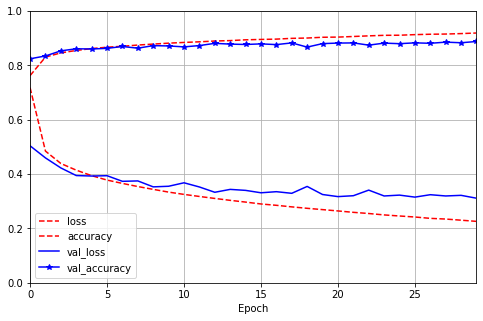

In [22]:
import matplotlib.pyplot as plt 
import pandas as pd 
pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,xlabel="Epoch",
    style=["r--","r--","b-","b-*"])
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3217 - accuracy: 0.8837


[0.32167911529541016, 0.8837000131607056]

**Using the model to make predictions**

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 110ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3] 
y_new

array([9, 2, 1], dtype=uint8)